In [1]:
# p.305  13.5 背景差分による動物体検出
import cv2
import IPython.display

def show_image(image):
    _, png = cv2.imencode('.png', image)
    i = IPython.display.Image(data=png)
    IPython.display.clear_output(wait=True)
    IPython.display.display(i)
    
def get_frame(cap, scalling_factor):
    r, frame = cap.read()
    if not r: return None
    frame = cv2.resize(frame, None,
                      fx=scalling_factor, fy=scalling_factor,
                      interpolation=cv2.INTER_AREA)
    return frame

In [2]:
import numpy as np

cap = cv2.VideoCapture('bbb.mp4')
scaling_factor = 1

bg_subtractor = cv2.createBackgroundSubtractorMOG2()

history = 100
learning_rate = 1.0 / history

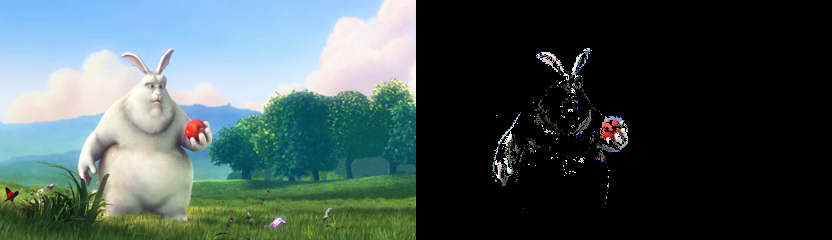

In [3]:
try:
    while True:
        frame = get_frame(cap, scaling_factor)
        if frame is None: break
            
        mask = bg_subtractor.apply(frame, learningRate=learning_rate)
        mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        img2 = cv2.hconcat([frame, frame & mask])
        show_image(img2)
        import time
        time.sleep(0.03)
        
except KeyboardInterrupt:
    print('Interrupted')
    
cap.release()